<a href="https://colab.research.google.com/github/Nirmalbhatii/CMCA546_NLP/blob/main/NLP_S25MCAG0039_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sample Sentences:
["\n\n\tThe/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.", "The/at jury/nn further/rbr said/vbd in/in term-end/nn presentments/nns that/cs the/at City/nn-tl Executive/jj-tl Committee/nn-tl ,/, which/wdt had/hvd over-all/jj charge/nn of/in the/at election/nn ,/, ``/`` deserves/vbz the/at praise/nn and/cc thanks/nns of/in the/at City/nn-tl of/in-tl Atlanta/np-tl ''/'' for/in the/at manner/nn in/in which/wdt the/at election/nn was/bedz conducted/vbn ./.", "The/at September-October/np term/nn jury/nn had/hvd been/ben charged/vbn by/in Fulton/np-tl Superior/jj-tl Court/nn-tl Judge/nn-tl Durwood/np Pye/np to/to investigate/vb reports/nns of/in possible/jj ``/`` irregularities/nns ''/'' in/in the/at hard-fought/jj primary/nn which/wdt was/bedz won/vbn by/in Mayor-nominate/nn-t

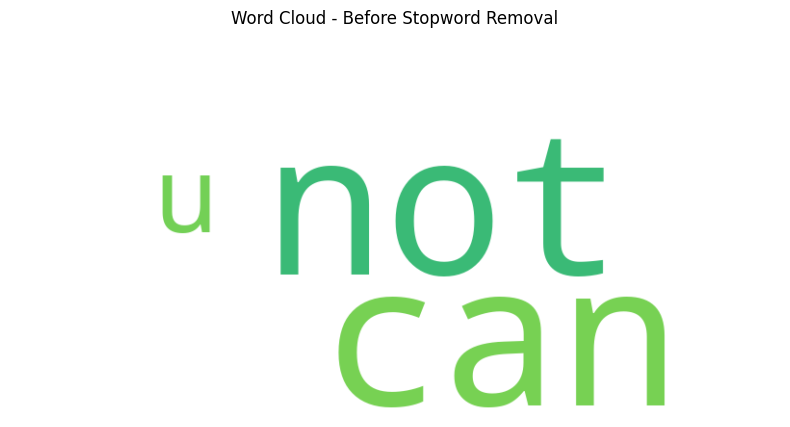

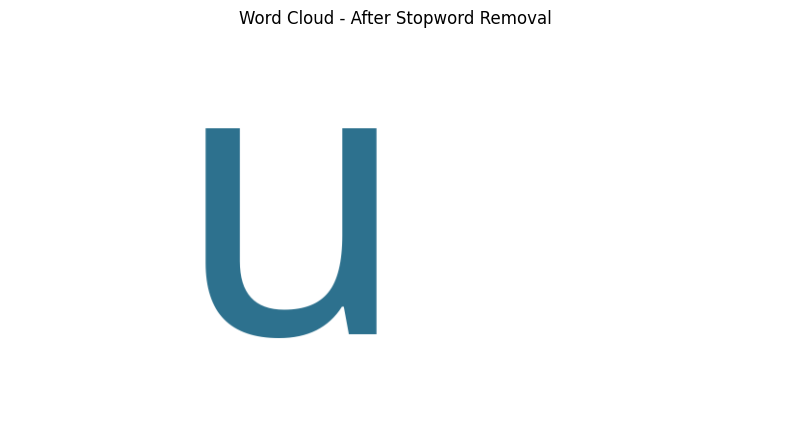

In [5]:

!pip install wordcloud


import nltk
from nltk.corpus import brown, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud



nltk.download('brown')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



text = brown.raw(categories='news')


sentences = sent_tokenize(text)

words = word_tokenize(text)

print("Sample Sentences:")
print(sentences[:5], "\n")
print("Sample Words:")
print(words[:20], "\n")


stop_words = set(stopwords.words('english'))


filtered_words = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]


freq_before = Counter([w.lower() for w in words if w.isalpha()])
print("Top 20 words BEFORE stopword removal:")
print(freq_before.most_common(20), "\n")

freq_after = Counter(filtered_words)
print("Top 20 words AFTER stopword removal:")
print(freq_after.most_common(20), "\n")


stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(w) for w in filtered_words]
freq_stemmed = Counter(stemmed_words)
print("Top 20 Stemmed Words:")
print(freq_stemmed.most_common(20), "\n")


lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words]
freq_lemmatized = Counter(lemmatized_words)
print("Top 20 Lemmatized Words:")
print(freq_lemmatized.most_common(20), "\n")



wc_before = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_before)
plt.figure(figsize=(10,5))
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Before Stopword Removal")
plt.show()


wc_after = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_after)
plt.figure(figsize=(10,5))
plt.imshow(wc_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - After Stopword Removal")
plt.show()
